Hunter Bennett | Glass Lab | Kupffer Strains Project | 14 March 2023

Notebook for gene ontology enrichment analysis of F1 *cis*, *trans*, and *mixed* genes

### Import packages, set plotting parameters

In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['savefig.dpi'] = 500

# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####

Set working directory  
Set paths to f1 and nsg differential expression analysis directories

In [3]:
workingDirectory = '/home/h1bennet/strains_github/results/Figure4/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

if not os.path.isdir('./promoter_motifs/'):
    os.mkdir('./promoter_motifs/')

### Motif analysis

In another workbook we determined lists of cis, trans, and mixed genes, now we will look at motif enrichment at their promoters.

Run the following in the command line

    for i in ./gene_lists/*.txt;
    do out=${i/gene_lists/promoter_motifs};
    out=${out/.txt/_motifs};
    findMotifs.pl $i mouse $out; done

### Read in results of GO analysis

In [ ]:
f = 'biological_process.txt' # particular GO file

trans_c = pd.read_csv("./promoter_motifs/cb6f1_kupffer_trans_c57_filt_pval_motifs/"+f, sep='\t')
cis_c = pd.read_csv("./promoter_motifs/cb6f1_kupffer_cis_c57_filt_pval_motifs/"+f, sep='\t')
trans_b = pd.read_csv("./promoter_motifs/cb6f1_kupffer_trans_balb_filt_pval_motifs/"+f, sep='\t')
cis_b = pd.read_csv("./promoter_motifs/cb6f1_kupffer_cis_balb_filt_pval_motifs/"+f, sep='\t')

# select subset of columns for merged df
select_cols=['TermID', 'Term', 'logP']

# merge columns
df = pd.merge(trans_c.loc[:, select_cols],
              cis_c.loc[:, select_cols],
              left_on="TermID",
              right_on="TermID",
              how='outer',
              suffixes=('_trans_c57', '_cis_c57')).merge(
              pd.merge(trans_b.loc[:, select_cols],
                       cis_b.loc[:, select_cols],
                       left_on="TermID",
                       right_on="TermID",
                       how='outer',
                       suffixes=('_trans_balb','_cis_balb')),
              left_on="TermID",
              right_on="TermID",
              how='outer')

df = df.set_index('TermID')

### View top enriched terms

In [19]:
n_genes = 20

Text(0.5,1,'BALB/cJ Trans')

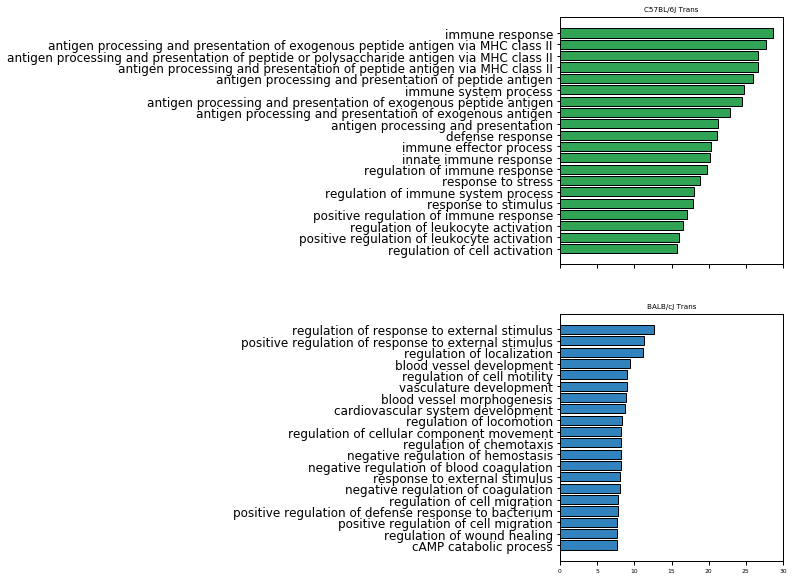

In [20]:
fig, axs = plt.subplots(2,1,figsize=(4,10), sharex=True)

y_ind = np.arange(n_genes)
enrichment = -df.sort_values('logP_trans_c57').loc[:, 'logP_trans_c57'][:n_genes]
axs[0].barh(y_ind,
         enrichment,
         align='center',
         linewidth=1,
         edgecolor='k',
         color='#31a354')
axs[0].set_yticks(y_ind)
axs[0].set_yticklabels(df.sort_values('logP_trans_c57').loc[:, 'Term_trans_c57'][:n_genes],
                       fontsize=12)
axs[0].invert_yaxis()
axs[0].set_title('C57BL/6J Trans')

enrichment = -df.sort_values('logP_trans_balb').loc[:, 'logP_trans_balb'][:n_genes]
axs[1].barh(y_ind,
         enrichment,
         align='center',
         linewidth=1,
         edgecolor='k',
         color='#3182bd')
axs[1].set_yticks(y_ind)
axs[1].set_yticklabels(df.sort_values('logP_trans_balb').loc[:, 'Term_trans_balb'][:n_genes],
                       fontsize=12)
axs[1].invert_yaxis()
axs[1].set_title('BALB/cJ Trans')

# 

There is a lot of redundancy in the top hits in GO analysis - we will select representative GO enrichment terms for high yield comparisons of the GO analysis

In [183]:
c57_go = [('GO:0019882', 'antigen processing and presentation'),
          ('GO:0050778', '+ reg. of immune response'),
          ('GO:0045321', 'leukocyte activation'),
          ('GO:0034121', 'reg. of TLR signaling')]

balb_go = [('GO:0032103', '+ reg. of response to ext. stim.'),
           ('GO:2000145', 'reg. of cell motility'),
           ('GO:0050920', 'reg. of chemotaxis'),
           ('GO:0061041', 'reg. of wound healing')]

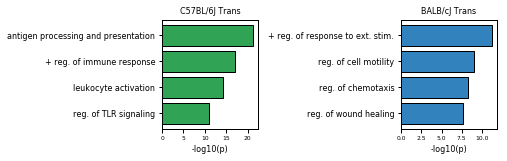

In [216]:
fig, axs = plt.subplots(1,2,figsize=(6,2))
plt.subplots_adjust(wspace=1.5)


y_ind = np.arange(len(c57_go))
enrichment = -df.loc[[i[0] for i in c57_go], 'logP_trans_c57']
axs[0].barh(y_ind,
         enrichment,
         align='center',
         linewidth=1,
         edgecolor='k',
         color='#31a354')
axs[0].set_yticks(y_ind)
axs[0].set_yticklabels([i[1] for i in c57_go],
                       fontsize=8)
axs[0].invert_yaxis()
axs[0].set_title('C57BL/6J Trans',
                       fontsize=8)
axs[0].set_xlabel('-log10(p)',
                       fontsize=8)


enrichment = -df.loc[[i[0] for i in balb_go], 'logP_trans_balb']
axs[1].barh(y_ind,
         enrichment,
         align='center',
         linewidth=1,
         edgecolor='k',
         color='#3182bd')
axs[1].set_yticks(y_ind)
axs[1].set_yticklabels([i[1] for i in balb_go],
                       fontsize=8)
axs[1].invert_yaxis()
axs[1].set_title('BALB/cJ Trans',
                       fontsize=8)
axs[1].set_xlabel('-log10(p)',
                       fontsize=8)

# Motif analysis

Analysis files produced by findMotifs.pl will also yield de novo and known motif enrichment analysis in promoters associated with genes compared to all other mm10 promoters.
* homerResults.html and homerResults/ have de novo motif analysis results
* knownResults.html and knownResults/ have known motif enrichment analysis results